# **Airline Customer Satisfaction Capstone**

## Exploratory Data Analysis

In our proposal, we outlined our business problem as follows:  What separates SIA's "satisfied" airline passengers from their "dissatisfied or neutral" passengers?

Since we already cleaned and wrangled our data in the previous step, now we want to perform exploratory data analysis.  This means that we want to perform initial investigations on the cleaned data to discover patterns and check hypotheses with the help of statistics and graphical representations.

In particular, we want to use this notebook to determine the relationship, if any, between the target "Satisfaction" and the predictor variables.

## 1. Table of Contents

[1. Table of Contents](#1.-Table-of-Contents)

[2. Import Packages](#2.-Import-Packages)

[3. Load Data](#3.-Load-Data)

[4. Explore the Data](#4.-Explore-the-Data)

[5. Summary of Exploratory Data Analysis](#5.-Summary-of-Exploratory-Data-Analysis)

## 2. Import Packages

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


## 3. Load Data

In [2]:
# Export the raw data
airline_data = pd.read_csv('/Users/lauren/Desktop/airline_passenger_satisfaction.csv')

# Export the cleaned data
airline_data_cleaned = pd.read_csv('/Users/lauren/Desktop/airline_data_cleaned.csv')

## 4. Explore the Data

In [3]:
# Let's look at the first few rows
airline_data_cleaned.head()

,Unnamed: 0,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,0,1,Male,48,First-time,Business,Business,821,2,5.0,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,1,2,Female,35,Returning,Business,Business,821,26,39.0,...,5,4,5,5,3,5,2,5,5,Satisfied
2,2,3,Male,41,Returning,Business,Business,853,0,0.0,...,3,5,3,5,5,3,4,3,3,Satisfied
3,3,4,Male,50,Returning,Business,Business,1905,0,0.0,...,5,5,5,4,4,5,2,5,5,Satisfied
4,4,5,Female,49,Returning,Business,Business,3470,0,1.0,...,3,4,4,5,4,3,3,3,3,Satisfied


In [4]:
# Now let's check the info
airline_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Unnamed: 0                              129880 non-null  int64  
 1   ID                                      129880 non-null  int64  
 2   Gender                                  129880 non-null  object 
 3   Age                                     129880 non-null  int64  
 4   Customer Type                           129880 non-null  object 
 5   Type of Travel                          129880 non-null  object 
 6   Class                                   129880 non-null  object 
 7   Flight Distance                         129880 non-null  int64  
 8   Departure Delay                         129880 non-null  int64  
 9   Arrival Delay                           129880 non-null  float64
 10  Departure and Arrival Time Convenience  1298

In [5]:
airline_data['Satisfaction'].value_counts()

Neutral or Dissatisfied    73452
Satisfied                  56428
Name: Satisfaction, dtype: int64

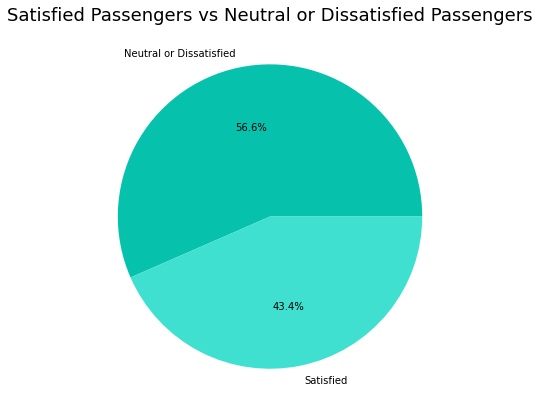

In [6]:
labels = airline_data['Satisfaction'].value_counts().index
sizes = airline_data['Satisfaction'].value_counts()
plt.figure(figsize = (7,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',colors = ['#06C2AC','#40E0D0'])
plt.title('Satisfied Passengers vs Neutral or Dissatisfied Passengers',color = 'black',fontsize = 18);

Per the above, it is clear that the data is split fairly evenly between satisfied and neutral or dissatisfied passengers.  But what separates the two?

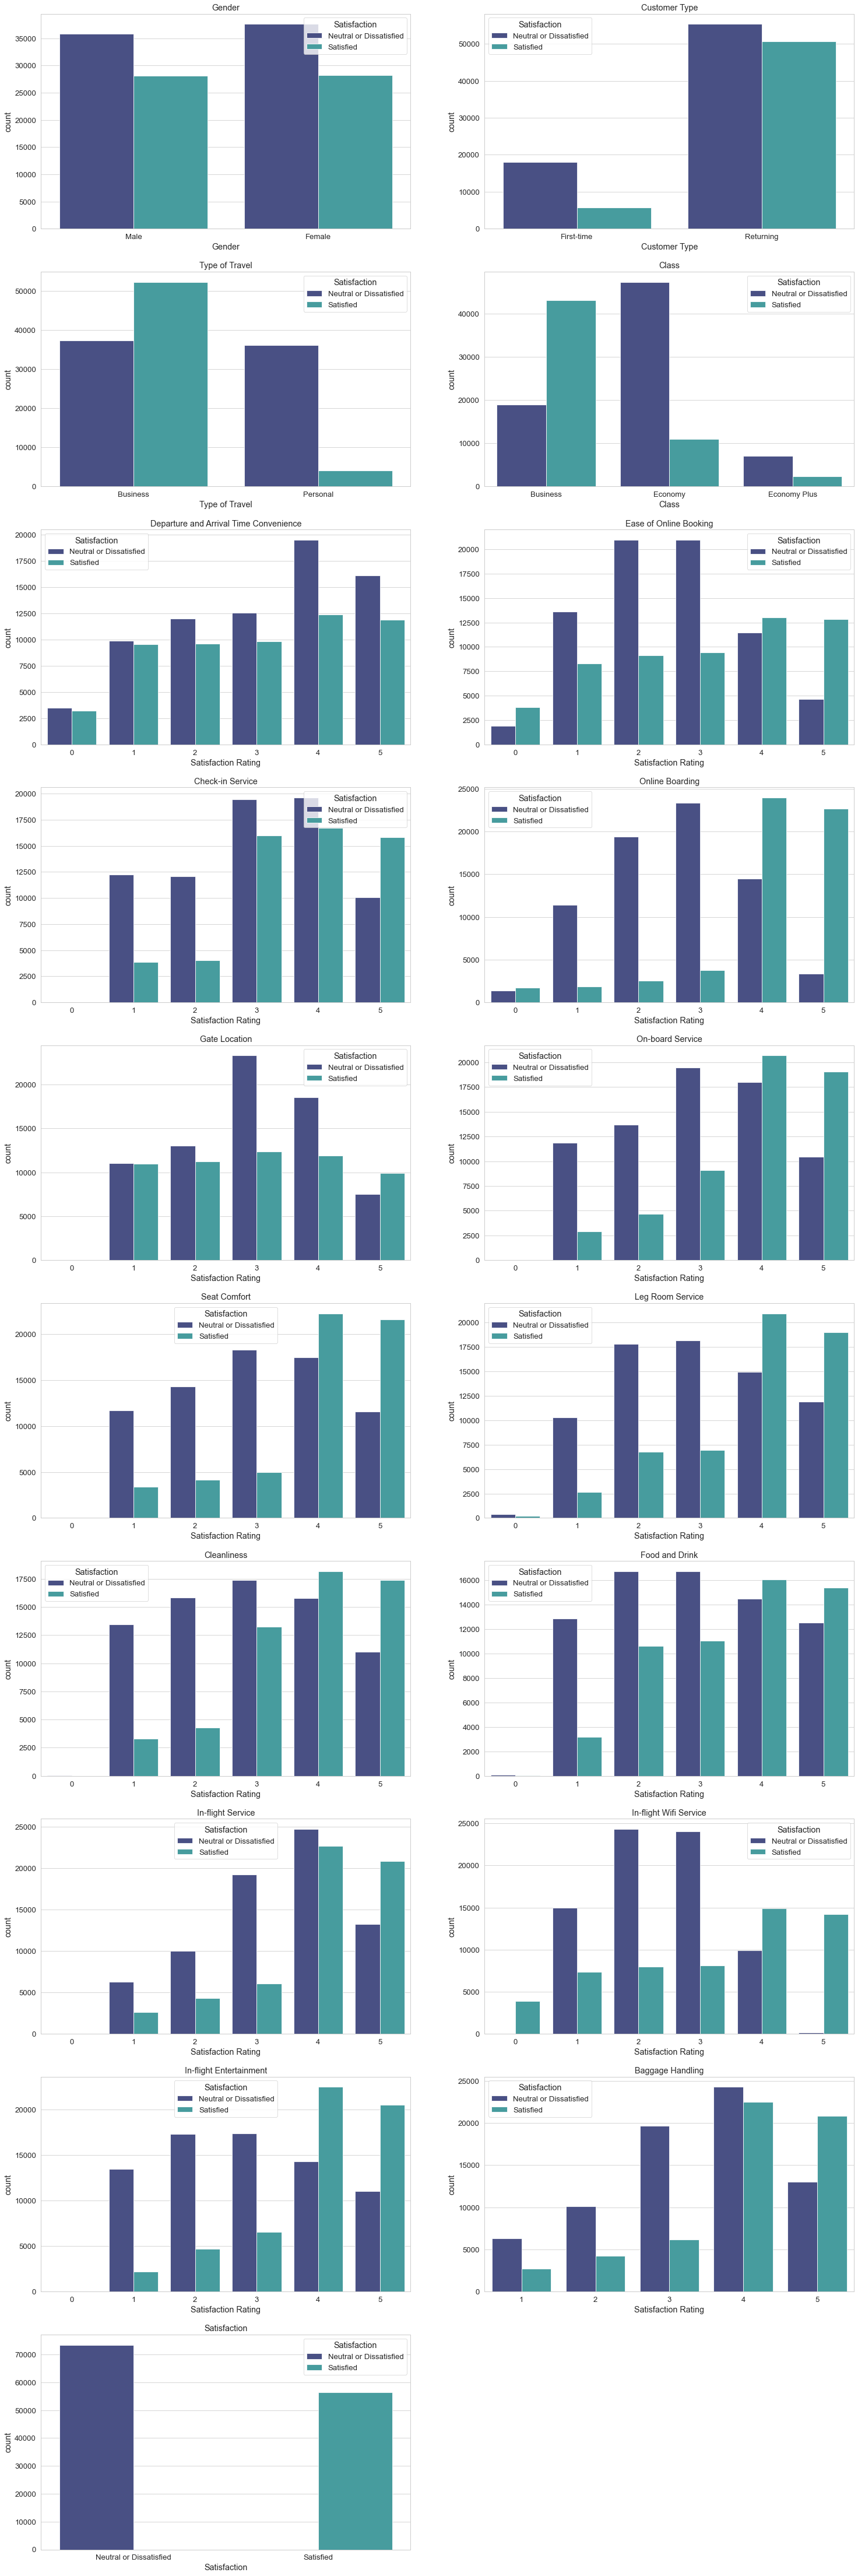

In [14]:
plt.figure(figsize=(25,80))

plt.subplot(10,2,1)
plt.title('Gender')
sns.countplot(data = airline_data_cleaned, x = 'Gender', hue = 'Satisfaction', palette = 'mako')

plt.subplot(10,2,2)
sns.countplot(data = airline_data_cleaned, x = 'Customer Type', hue = 'Satisfaction', palette = 'mako')
plt.title('Customer Type')

plt.subplot(10,2,3)
sns.countplot(data = airline_data_cleaned, x = 'Type of Travel', hue = 'Satisfaction', palette = 'mako')
plt.title('Type of Travel')

plt.subplot(10,2,4)
sns.countplot(data = airline_data_cleaned, x = 'Class', hue = 'Satisfaction', palette = 'mako')
plt.title('Class')

plt.subplot(10,2,5)
sns.countplot(data = airline_data_cleaned, x = 'Departure and Arrival Time Convenience', hue = 'Satisfaction', palette = 'mako')
plt.title('Departure and Arrival Time Convenience')
plt.xlabel('Satisfaction Rating')

plt.subplot(10,2,6)
sns.countplot(data = airline_data_cleaned, x = 'Ease of Online Booking', hue = 'Satisfaction', palette = 'mako')
plt.title('Ease of Online Booking')
plt.xlabel('Satisfaction Rating')

plt.subplot(10,2,7)
sns.countplot(data = airline_data_cleaned, x = 'Check-in Service', hue = 'Satisfaction', palette = 'mako')
plt.title('Check-in Service')
plt.xlabel('Satisfaction Rating')

plt.subplot(10,2,8)
sns.countplot(data = airline_data_cleaned, x = 'Online Boarding', hue = 'Satisfaction', palette = 'mako')
plt.title('Online Boarding')
plt.xlabel('Satisfaction Rating')

plt.subplot(10,2,9)
sns.countplot(data = airline_data_cleaned, x = 'Gate Location', hue = 'Satisfaction', palette = 'mako')
plt.title('Gate Location')
plt.xlabel('Satisfaction Rating')

plt.subplot(10,2,10)
sns.countplot(data = airline_data_cleaned, x = 'On-board Service', hue = 'Satisfaction', palette = 'mako')
plt.title('On-board Service')
plt.xlabel('Satisfaction Rating')

plt.subplot(10,2,11)
sns.countplot(data = airline_data_cleaned, x = 'Seat Comfort', hue = 'Satisfaction', palette = 'mako')
plt.title('Seat Comfort')
plt.xlabel('Satisfaction Rating')

plt.subplot(10,2,12)
sns.countplot(data = airline_data_cleaned, x = 'Leg Room Service', hue = 'Satisfaction', palette = 'mako')
plt.title('Leg Room Service')
plt.xlabel('Satisfaction Rating')

plt.subplot(10,2,13)
sns.countplot(data = airline_data_cleaned, x = 'Cleanliness', hue = 'Satisfaction', palette = 'mako')
plt.title('Cleanliness')
plt.xlabel('Satisfaction Rating')

plt.subplot(10,2,14)
sns.countplot(data = airline_data_cleaned, x = 'Food and Drink', hue = 'Satisfaction', palette = 'mako')
plt.title('Food and Drink')
plt.xlabel('Satisfaction Rating')

plt.subplot(10,2,15)
sns.countplot(data = airline_data_cleaned, x = 'In-flight Service', hue = 'Satisfaction', palette = 'mako')
plt.title('In-flight Service')
plt.xlabel('Satisfaction Rating')

plt.subplot(10,2,16)
sns.countplot(data = airline_data_cleaned, x = 'In-flight Wifi Service', hue = 'Satisfaction', palette = 'mako')
plt.title('In-flight Wifi Service')
plt.xlabel('Satisfaction Rating')

plt.subplot(10,2,17)
sns.countplot(data = airline_data_cleaned, x = 'In-flight Entertainment', hue = 'Satisfaction', palette = 'mako')
plt.title('In-flight Entertainment')
plt.xlabel('Satisfaction Rating')

plt.subplot(10,2,18)
sns.countplot(data = airline_data_cleaned, x = 'Baggage Handling', hue = 'Satisfaction', palette = 'mako')
plt.title('Baggage Handling')
plt.xlabel('Satisfaction Rating')

plt.subplot(10,2,19)
sns.countplot(data = airline_data_cleaned, x = 'Satisfaction', hue = 'Satisfaction', palette = 'mako')
plt.title('Satisfaction')

plt.show()

From the above, it appears that there is not much of a difference in satisfaction between the genders.  However, there is a difference between first-time passengers, and returning passengers, with returning passengers showing satifaction at a greater rate than first-time passengers.  Furthermore, business travelers are also more satisfied on a whole than personal travelers, and those traveling in business class are more satisfied than those traveling in economy class or economy plus class.  Most of that inherently makes sense.

The next few categories are where it gets a little more interesting.  SIA passengers highly rated their satisfaction for SIA's check-in service, online boarding, on-board service, seat comfort, leg room service, cleanliness, food and drink, in-flight service, in-flight entertainment, and baggage handling.

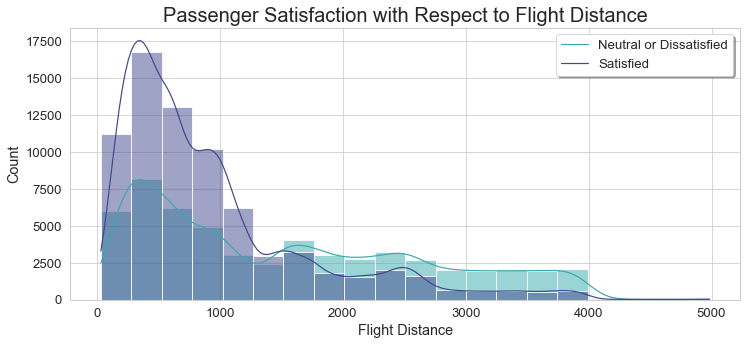

In [8]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
sns.set_context('paper', font_scale=1.5)

sns.histplot(x='Flight Distance', data = airline_data_cleaned, bins = 20, hue ='Satisfaction',palette="mako", kde = True).set_title('Passenger Satisfaction with Respect to Flight Distance',fontsize=20)
plt.legend(['Neutral or Dissatisfied','Satisfied'],shadow = True, loc = 0);

The above graph appears to illustrate that SIA's passengers are much more satisfied over shorter flight distances.  It is a normal right-skewed distribution.

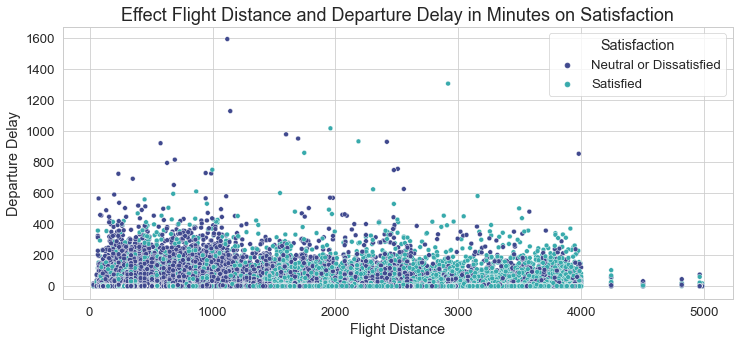

In [9]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=airline_data_cleaned['Flight Distance'],y=airline_data_cleaned['Departure Delay'], hue=airline_data_cleaned['Satisfaction'],palette="mako").set_title('Effect Flight Distance and Departure Delay in Minutes on Satisfaction', fontsize=18);


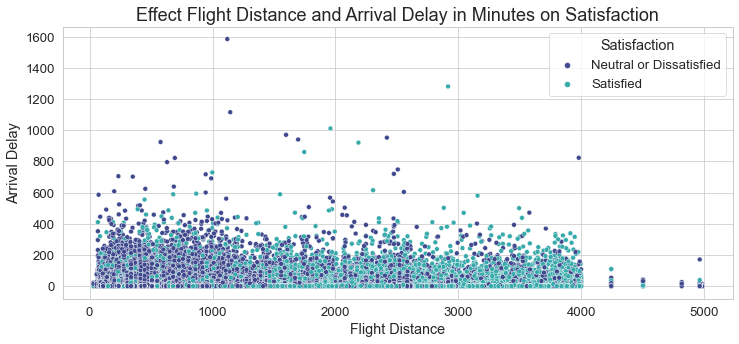

In [10]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=airline_data_cleaned['Flight Distance'],y=airline_data_cleaned['Arrival Delay'], hue=airline_data_cleaned['Satisfaction'],palette="mako").set_title('Effect Flight Distance and Arrival Delay in Minutes on Satisfaction', fontsize=18);



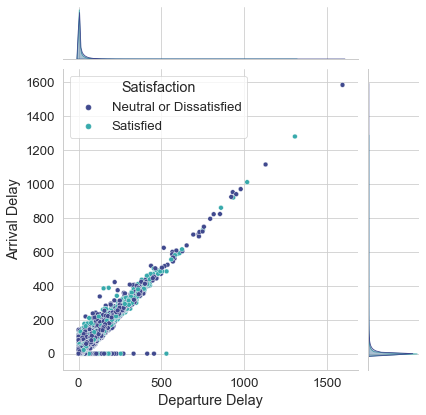

In [11]:
sns.set_style('whitegrid')

sns.set_context('paper', font_scale=1.5)

sns.jointplot(x='Departure Delay', y='Arrival Delay', 
              data = airline_data_cleaned, hue = 'Satisfaction',palette="mako")



In [12]:
numerical_cols = airline_data_cleaned.loc[:, 'Departure and Arrival Time Convenience': 'Baggage Handling'].columns
airline_data_cleaned[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Departure and Arrival Time Convenience,129880.0,3.057599,1.526741,0.0,2.0,3.0,4.0,5.0
Ease of Online Booking,129880.0,2.756876,1.401740,0.0,2.0,3.0,4.0,5.0
Check-in Service,129880.0,3.306267,1.266185,0.0,3.0,3.0,4.0,5.0
Online Boarding,129880.0,3.252633,1.350719,0.0,2.0,3.0,4.0,5.0
Gate Location,129880.0,2.976925,1.278520,0.0,2.0,3.0,4.0,5.0
On-board Service,129880.0,3.383023,1.287099,0.0,2.0,4.0,4.0,5.0
Seat Comfort,129880.0,3.441361,1.319289,0.0,2.0,4.0,5.0,5.0
Leg Room Service,129880.0,3.350878,1.316252,0.0,2.0,4.0,4.0,5.0
Cleanliness,129880.0,3.286326,1.313682,0.0,2.0,3.0,4.0,5.0
Food and Drink,129880.0,3.204774,1.329933,0.0,2.0,3.0,4.0,5.0


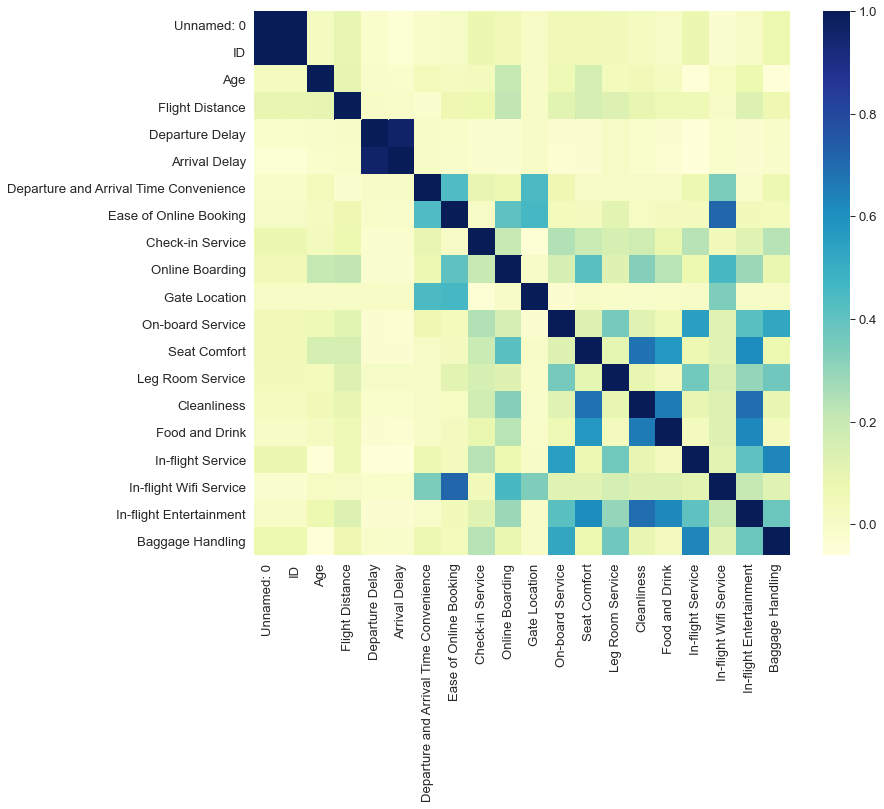

In [13]:
plt.subplots(figsize=(12,10))
sns.heatmap(airline_data_cleaned.corr(), cmap='YlGnBu');

## 5. Summary of Exploratory Data Analysis

Based on the above graphs, it appears that the variables which led to the highest numbers of satisfied passengers were the following:

* Check-in service
* Online boarding
* On-board ervice
* Seat comfort
* Leg room service
* Cleanliness
* Food and drink
* In-flight service
* In-flight entertainment
* Baggage handling

In [15]:
# Export the data to a new file

airline_data.to_csv('/Users/lauren/Desktop/airline_data_cleaned2.csv')